In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/XM/optimaC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/XM/optimaC


# instalacion biblioteca XM

In [111]:
!pip install pydataxm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 11.1 MB/s eta 0:00:00
  Created wheel for pydataxm: filename=pydataxm-0.3.2-py3-none-any.whl size=3483 sha256=124bb3c3afa04da91a3127bb399e68b81a0113be308d9aa055e7077c00e2ecc8
  Stored in directory: /root/.cache/pip/wheels/21/a8/ff/7dbfb0451458bbbd9d4725ef38492c21adc0a978d3d104862b
Successfully built pydataxm


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
import datetime as dt


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# import gurobipy as gb
# from gurobipy import *
import numpy as np
import pprint
# from turtle import width
# from prophet import Prophet
# import cvxpy as cvx
from requests.exceptions import ConnectionError

import matplotlib.pyplot as plt


from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar
import datetime as dt                            
from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
%matplotlib inline

# conexion con sinergox

In [113]:
objetoAPI = pydataxm.ReadDB()                    #Se almacena el servicio en el nombre objetoAPI

In [4]:
df = pd.read_excel('IBR2013.xlsx')
df = df.drop([0])
df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)

df_cleaned = df.replace({r'\r|\n': ' '}, regex=True)

# Remove specific unwanted characters or patterns
df_cleaned = df_cleaned.replace({'Descargado de sistema del Banco de la República miércoles, 17 de mayo de 2023 3:23:36 p. m.': ''})

# Drop rows or columns with empty cells
df_cleaned = df_cleaned.dropna()

# Reset the index if needed
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

,Fecha,"Indicador Bancario de Referencia (IBR) overnight, nominal"
0,2018/01/02,4.500
1,2018/01/03,4.520
2,2018/01/04,4.543
3,2018/01/05,4.543
4,2018/01/09,4.552
...,...,...
1309,2023/05/11,12.285
1310,2023/05/12,12.288
1311,2023/05/15,12.288
1312,2023/05/16,12.288


# limpieza y grafica IBR y tasa de politica monetaria

           Fecha  Indicador Bancario de Referencia (IBR) overnight, nominal
0     2018/01/02                                              4.500        
1     2018/01/03                                              4.520        
2     2018/01/04                                              4.543        
3     2018/01/05                                              4.543        
4     2018/01/09                                              4.552        
...          ...                                                ...        
1309  2023/05/11                                             12.285        
1310  2023/05/12                                             12.288        
1311  2023/05/15                                             12.288        
1312  2023/05/16                                             12.288        
1313  2023/05/17                                             12.288        

[1314 rows x 2 columns]


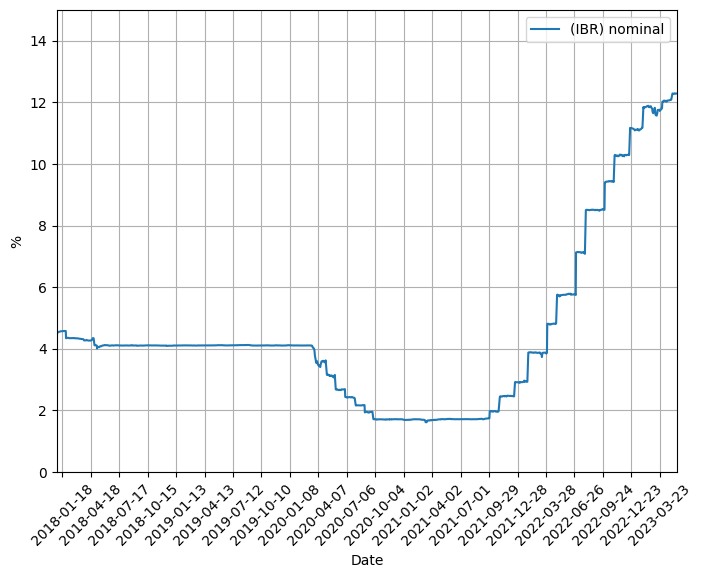

In [10]:

# Cargar los datos de Excel en un DataFrame de pandas
df = pd.read_excel('IBR2013.xlsx')
df = df.drop([0])
df = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
df = df.dropna()
# Handle specific formatting issue (e.g., removing non-printable characters)


# Now you can work with the cleaned DataFrame
print(df_cleaned)
df['Fecha'] = pd.to_datetime(df['Fecha'])

#
# df2 = pd.read_excel('TIP.xlsx')
# df2 = df2.drop([0])
# df2 = df2.dropna()
# df2['Fecha'] = pd.to_datetime(df2['Fecha (dd/mm/aaaa)'])
# df2 = df2.drop('Fecha (dd/mm/aaaa)', axis=1)

# Configurar la figura del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear un gráfico de líneas con los datos de la columna 'dato1'
ax.plot(df['Fecha'], df['Indicador Bancario de Referencia (IBR) overnight, nominal'], label='(IBR) nominal')

# ax.plot(df2['Fecha'], df2['Tasa de intervención de política monetaria (%)'], label='TIP')

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(DayLocator(interval=90))
plt.xticks(rotation=45)

fecha_inicio = dt.datetime(2018, 1, 1)
fecha_fin = dt.datetime(2023, 5, 16)
ax.set_xlim(fecha_inicio, fecha_fin)
ax.set_ylim(0, 15)

# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Date')
ax.set_ylabel('%')
# ax.set_title('TIP and IBR 2018-2023')

# Mostrar la leyenda del gráfico
ax.legend()
plt.grid()
# Mostrar el gráfico
plt.show()

# Grafica indices IPP e IPC

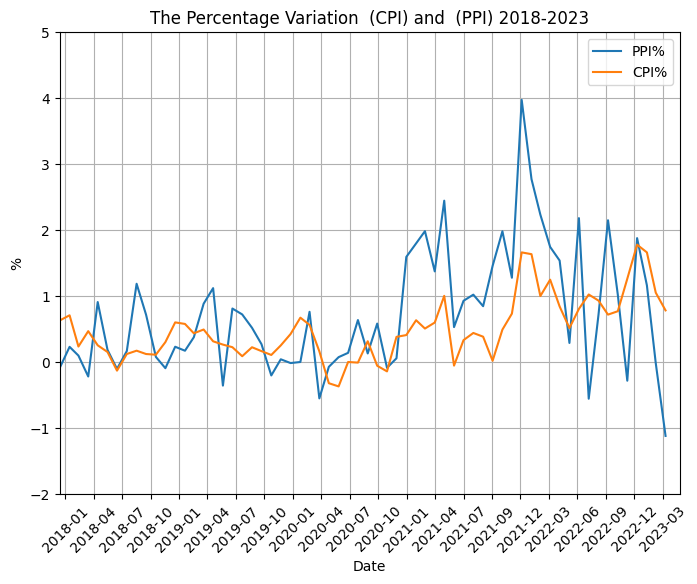

In [11]:
df = pd.read_excel('IPCIPP.xls')



df['Fecha'] = pd.to_datetime(df['Fecha'])

fig, ax = plt.subplots(figsize=(8, 6))

# Crear un gráfico de líneas con los datos de la columna 'dato1'
ax.plot(df['Fecha'], df['IPP%'], label='PPI%')

ax.plot(df['Fecha'], df['IPC%'], label='CPI%')

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(DayLocator(interval=90))
plt.xticks(rotation=45)

fecha_inicio = dt.datetime(2018, 1, 1)
fecha_fin = dt.datetime(2023, 5, 16)
ax.set_xlim(fecha_inicio, fecha_fin)
ax.set_ylim(-2,5)

# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Date')
ax.set_ylabel('%')
ax.set_title("The Percentage Variation  (CPI) and  (PPI) 2018-2023")

# Mostrar la leyenda del gráfico
ax.legend()
plt.grid()
# Mostrar el gráfico
plt.show()

# TRM

<ipython-input-12-ac4668628d82>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('TRM2018.xlsx')


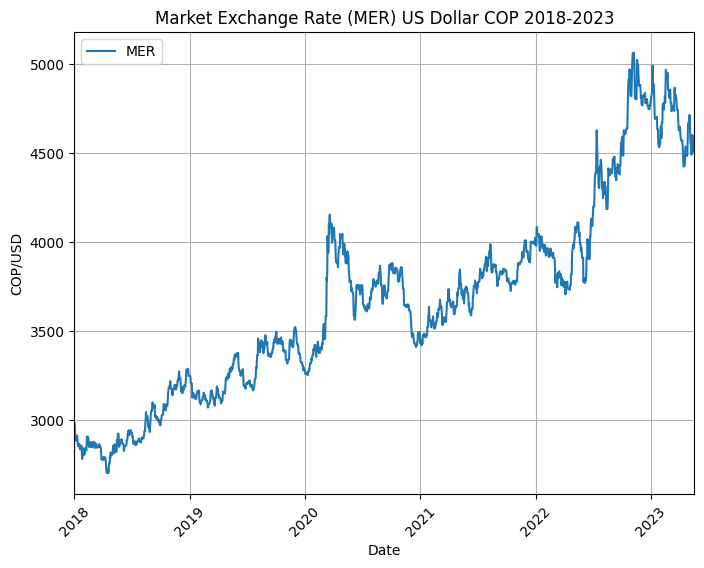

In [12]:
df = pd.read_excel('TRM2018.xlsx')

df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y/%m/%d')

fig, ax = plt.subplots(figsize=(8, 6))

# Crear un gráfico de líneas con los datos de la columna 'dato1'
ax.plot(df['Fecha'], df['Tasa Representativa del Mercado (TRM)'], label='MER')
plt.xticks(rotation=45)

fecha_inicio = dt.datetime(2018, 1, 1)
fecha_fin = dt.datetime(2023, 5, 18)
ax.set_xlim(fecha_inicio, fecha_fin)


# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Date')
ax.set_ylabel('COP/USD')
ax.set_title('Market Exchange Rate (MER) US Dollar COP 2018-2023')

# Mostrar la leyenda del gráfico
ax.legend()
plt.grid()
# Mostrar el gráfico
plt.show()

# Precio spot y de escacez 



/usr/local/lib/python3.10/dist-packages/pydataxm/pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pydataxm/pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pydataxm/pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pydataxm/pydataxm.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(temporal_data, ign

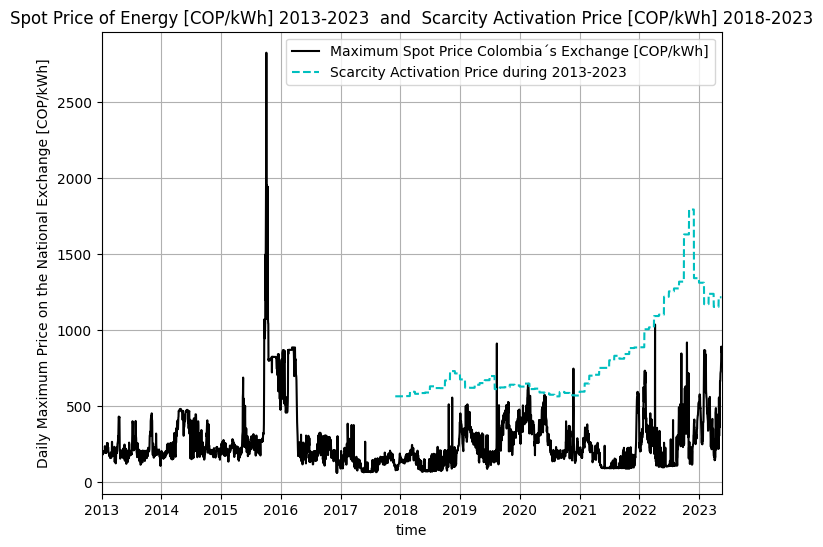

In [115]:
df_precio_bolsa = objetoAPI.request_data("PrecBolsNaci", "Sistema", dt.date(2013, 1, 1), dt.date(2023, 5, 19))
df_precio_bolsa.drop(columns=['Id', 'Values_code'], inplace=True)          
df_precio_bolsa.set_index('Date', inplace=True)                              
df_resumen_anual = df_precio_bolsa.aggregate(['mean', 'max', 'min'], axis=1)  

#####################################################################################################################################################

df_precio_escacez_Act= objetoAPI.request_data("PrecEscaAct", "Sistema", dt.date(2013, 1, 1), dt.date(2023, 5, 19))   
df_precio_escacez_Act.drop(columns=['Id'], inplace=True)           
df_precio_escacez_Act.set_index('Date', inplace=True)

############plot ##################################################

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#ax.plot(df_resumen_anual.index, df_resumen_anual['mean'], "k",  label='Promedio diario del precio de bolsa nacional')
ax.plot(df_resumen_anual.index, df_resumen_anual['max'], "k", label='Maximum Spot Price Colombia´s Exchange [COP/kWh]')
ax.plot(df_precio_escacez_Act.index, df_precio_escacez_Act, "c--", label="Scarcity Activation Price during 2013-2023")
#ax.plot(df_resumen_anual.index, df_resumen_anual['min'], "c--", label='Mínimo diario del precio de bolsa nacional')
ax.set_ylabel('Daily Maximum Price on the National Exchange [COP/kWh]')
ax.set_xlabel('time')
fecha_inicio = dt.datetime(2013, 1, 1)
fecha_fin = dt.datetime(2023, 5, 19)
ax.set_xlim(fecha_inicio, fecha_fin)
plt.title('Spot Price of Energy [COP/kWh] 2013-2023  and  Scarcity Activation Price [COP/kWh] 2018-2023')
ax.legend()
plt.grid()
plt.show()

# demanda de energia energia pico en potencia 

In [ ]:
df_dem_pico = objetoAPI.request_data("DemaMaxPot", "Sistema", dt.date(2010, 1, 1), dt.date(2023, 5, 19)) #consulta de la variable generacion sistema nacional por sistema


<ipython-input-141-4da7ff0417b9>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df_dem_pico.groupby('Year').mean()


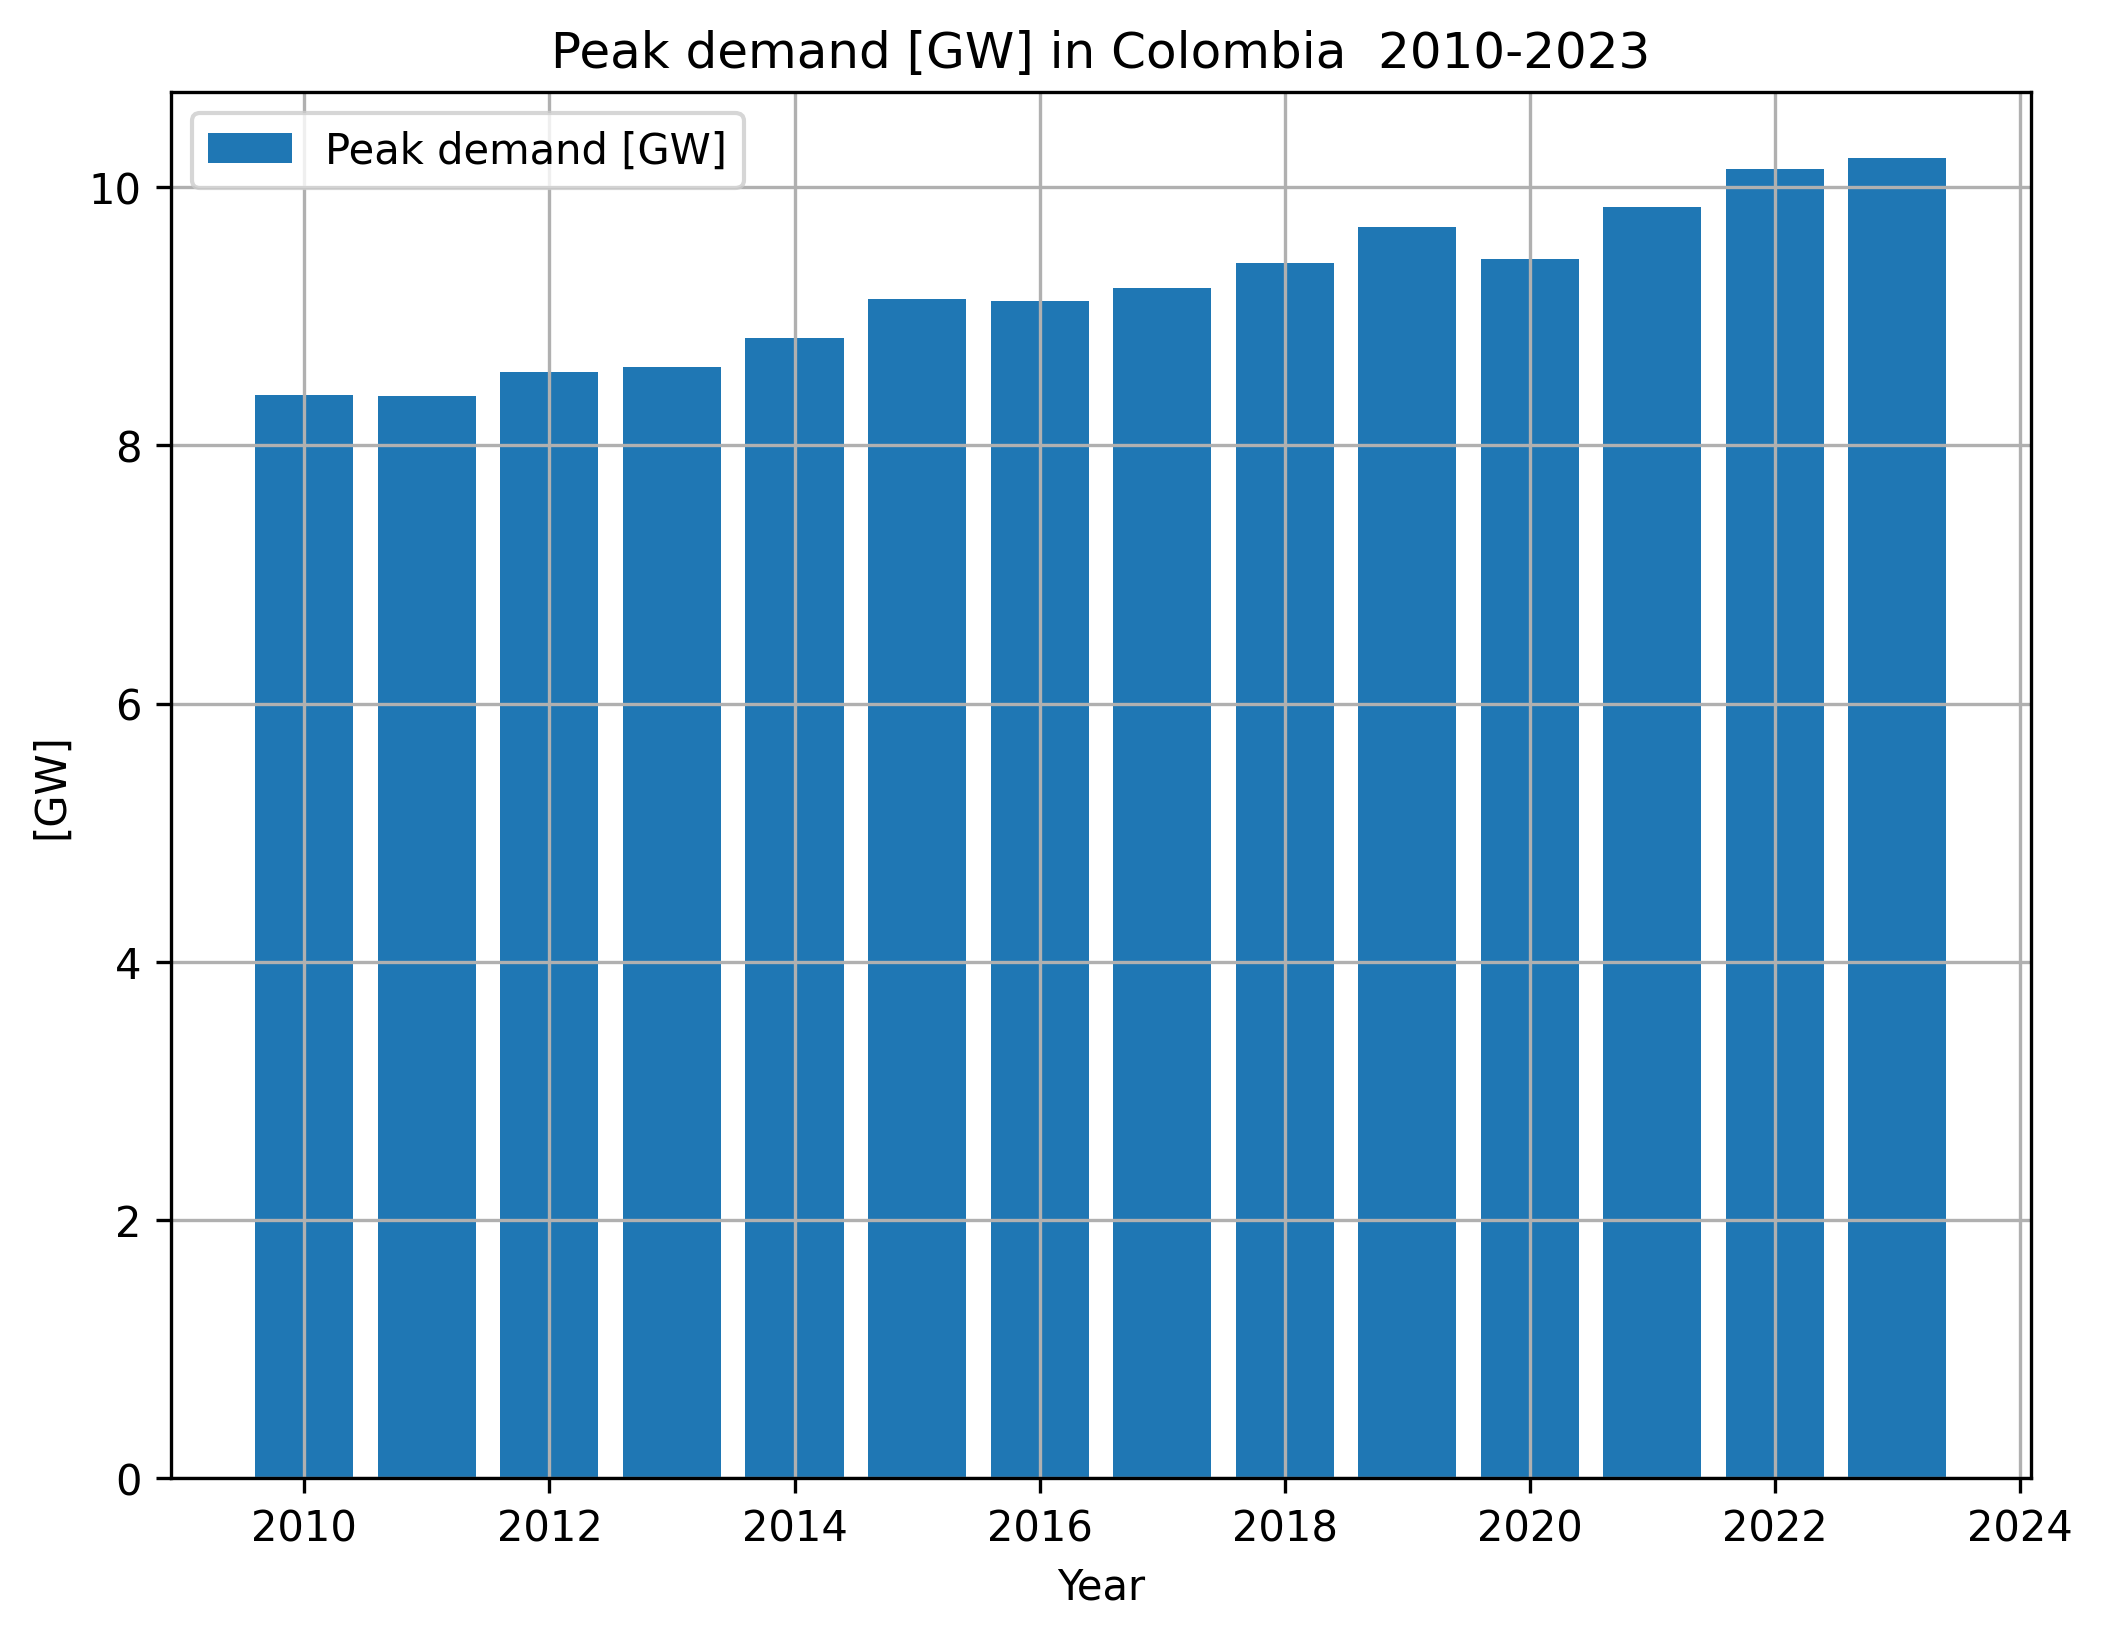

In [141]:

df_dem_pico['Date'] = pd.to_datetime(df_dem_pico['Date'])

# Extract the year from the "Date" column
df_dem_pico['Year'] = df_dem_pico['Date'].dt.year

# Group by year
grouped_df = df_dem_pico.groupby('Year').mean()
fig, ax = plt.subplots(1, 1, figsize=(8, 6),dpi=300)
#ax.plot(df_resumen_anual.index, df_resumen_anual['mean'], "k",  label='Promedio diario del precio de bolsa nacional')
#ax.stackplot(df_resumen_anual_reg.index,[ df_resumen_anual_reg['max']/1000000,df_resumen_anual_no_reg['max']/100000], labels=['Maximum daily demand in the regulated marked kWh]',"Maximum daily demand in the no regulated marked kWh"])
ax.bar(grouped_df.index, grouped_df['Value']/1000000, label="Peak demand [GW]")
#ax.plot(df_resumen_anual.index, df_resumen_anual['min'], "c--", label='Mínimo diario del precio de bolsa nacional')
ax.set_ylabel('[GW]')
ax.set_xlabel('Year')
# fecha_inicio = dt.datetime(2010, 1, 1)
# fecha_fin = dt.datetime(2023, 5, 19)
# ax.set_xlim(fecha_inicio, fecha_fin)
plt.title('Mean Peak demand [GW] in Colombia  2010-2023')
ax.legend()
plt.grid()
plt.show()

In [ ]:
df_dem_sin = objetoAPI.request_data("DemaSIN", "Sistema", dt.date(2010, 1, 1), dt.date(2023, 5, 19)) #consulta de la variable generacion sistema nacional por sistema
df_dem_sin.head(1)#
df_dem_sin['Date'] = pd.to_datetime(df_dem_sin['Date'])

# Extract the year from the "Date" column
df_dem_sin['Year'] = df_dem_sin['Date'].dt.year

# Group by year
grouped_df = df_dem_sin.groupby('Year').sum()

print(grouped_df)

In [130]:
grouped_df

,Value
Year,
2010,5.614762e+10
2011,5.660126e+10
2012,5.936990e+10
2013,6.089028e+10
2014,6.357126e+10
2015,6.617475e+10
2016,6.631947e+10
2017,6.689304e+10
2018,6.912673e+10


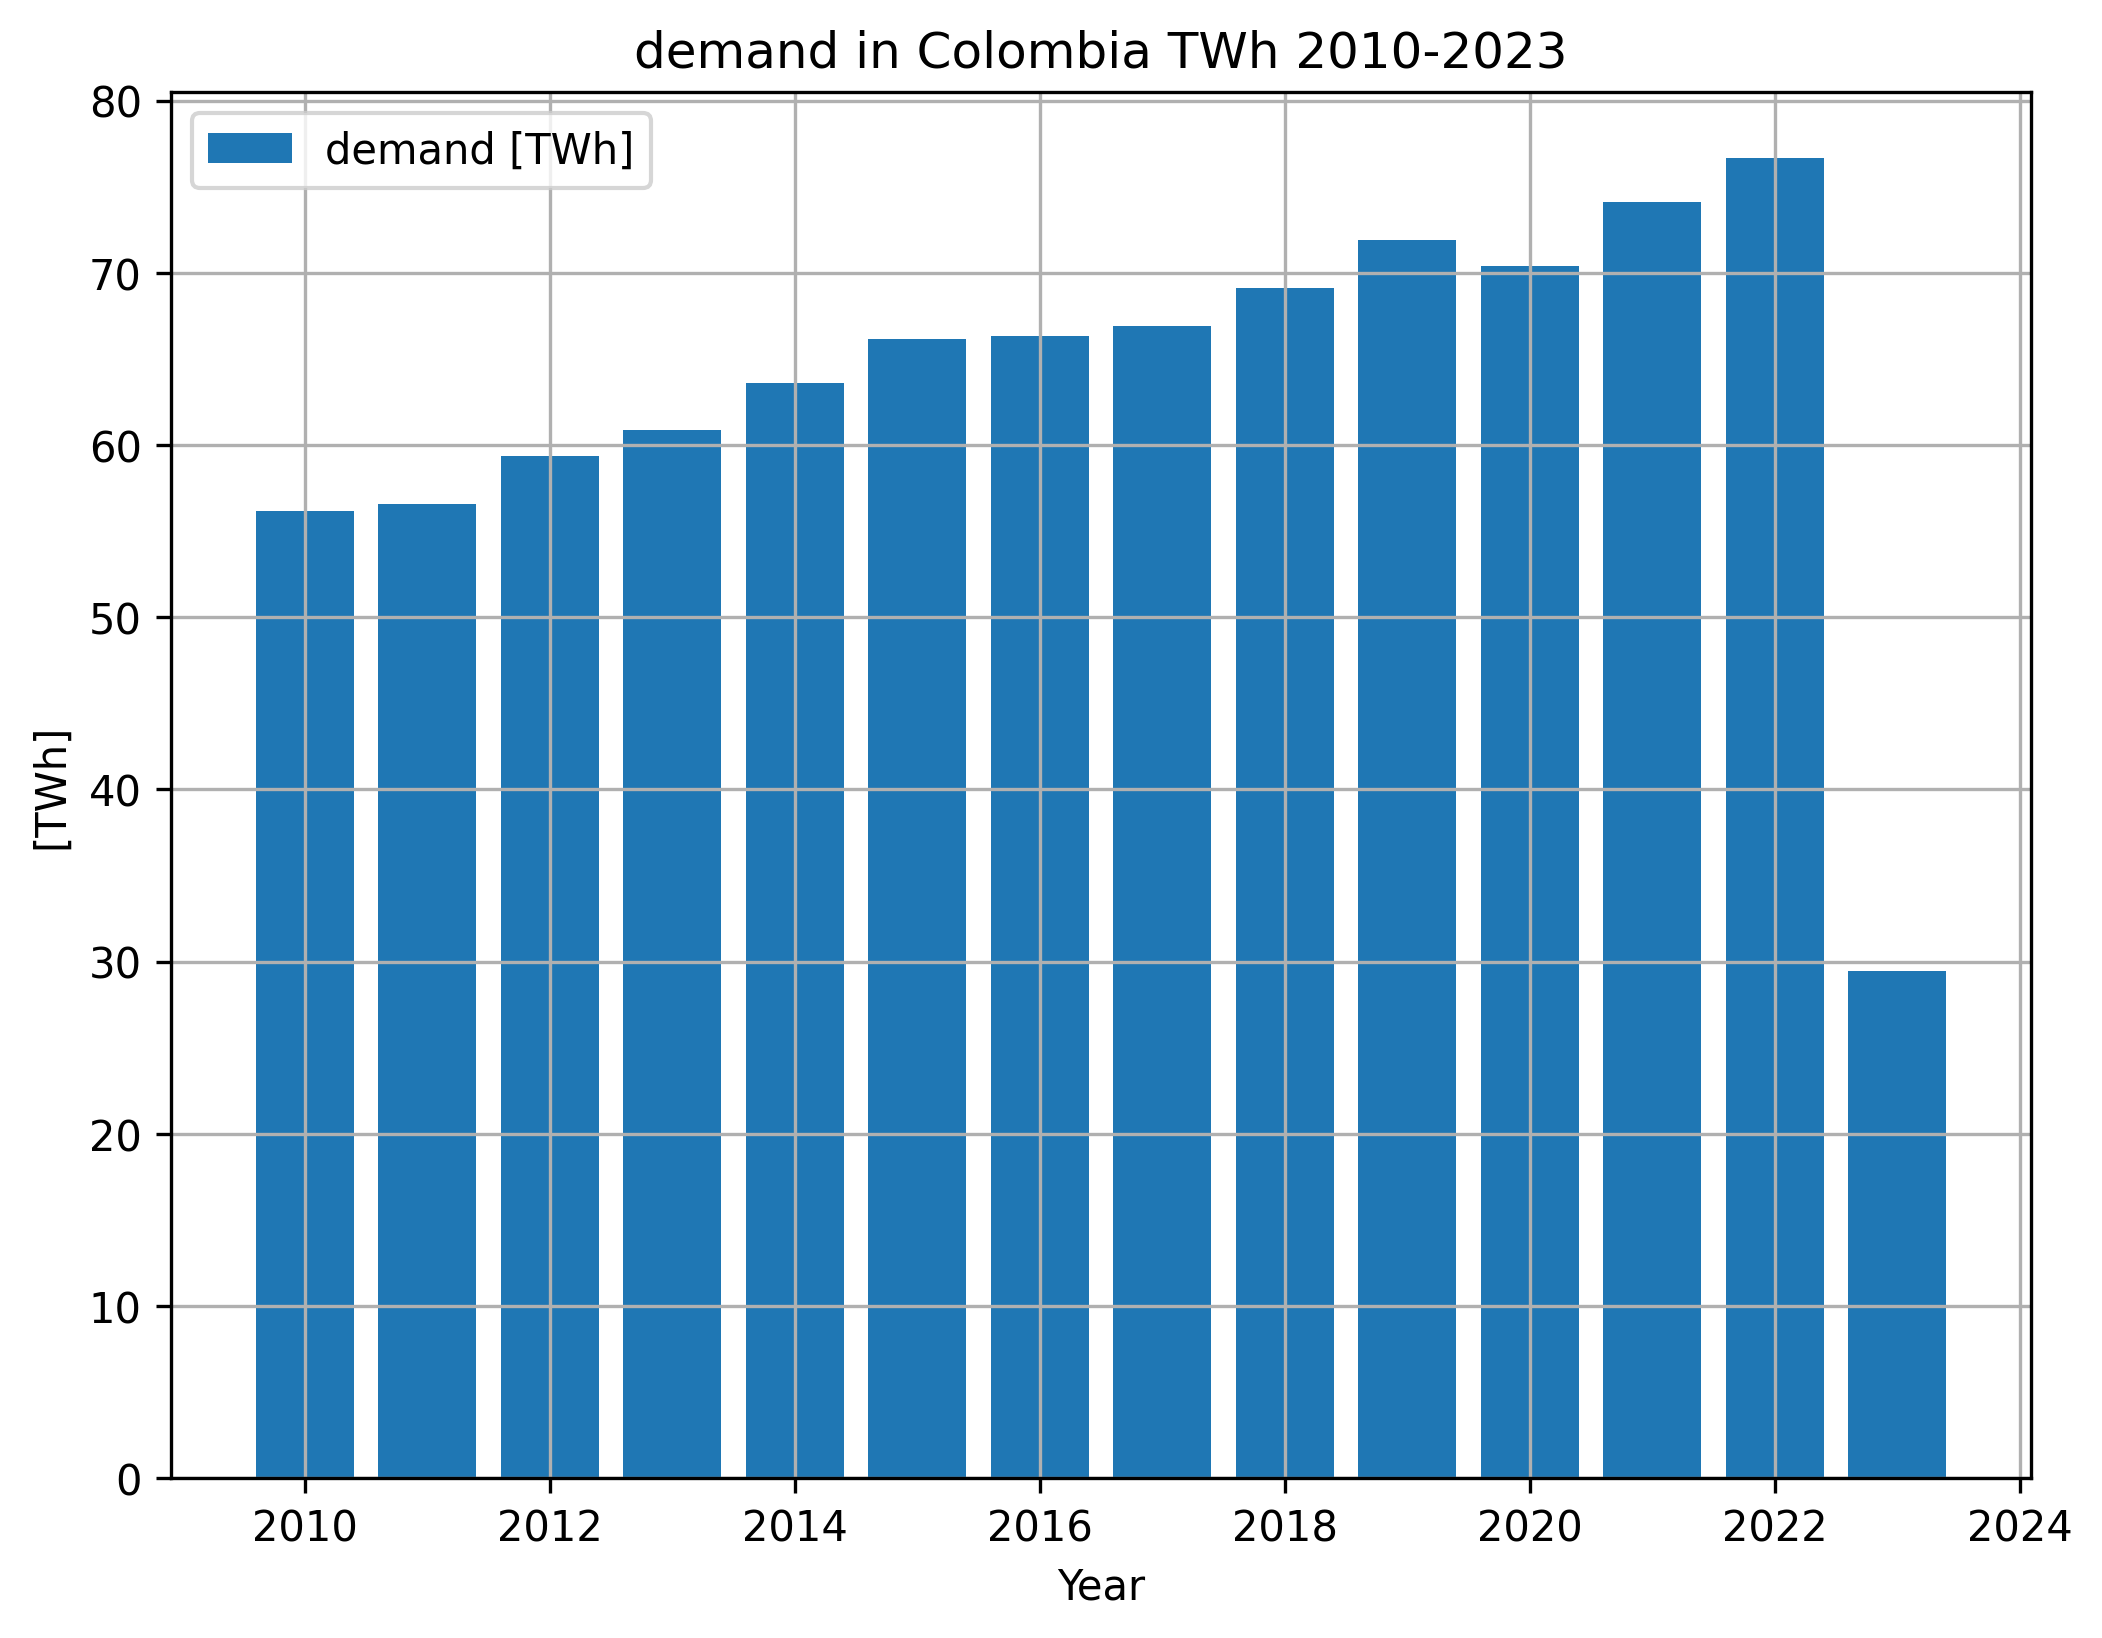

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6),dpi=300)
#ax.plot(df_resumen_anual.index, df_resumen_anual['mean'], "k",  label='Promedio diario del precio de bolsa nacional')
#ax.stackplot(df_resumen_anual_reg.index,[ df_resumen_anual_reg['max']/1000000,df_resumen_anual_no_reg['max']/100000], labels=['Maximum daily demand in the regulated marked kWh]',"Maximum daily demand in the no regulated marked kWh"])
ax.bar(grouped_df.index, grouped_df['Value']/1000000000, label="demand [TWh]")
#ax.plot(df_resumen_anual.index, df_resumen_anual['min'], "c--", label='Mínimo diario del precio de bolsa nacional')
ax.set_ylabel('[TWh]')
ax.set_xlabel('Year')
# fecha_inicio = dt.datetime(2010, 1, 1)
# fecha_fin = dt.datetime(2023, 5, 19)
# ax.set_xlim(fecha_inicio, fecha_fin)
plt.title('Electricity demand [TWh] in Colombia  2010-2023')
ax.legend()
plt.grid()
plt.show()

# Energía y Precios transados en contratos con destino a Mercado Regulado y No Regulado

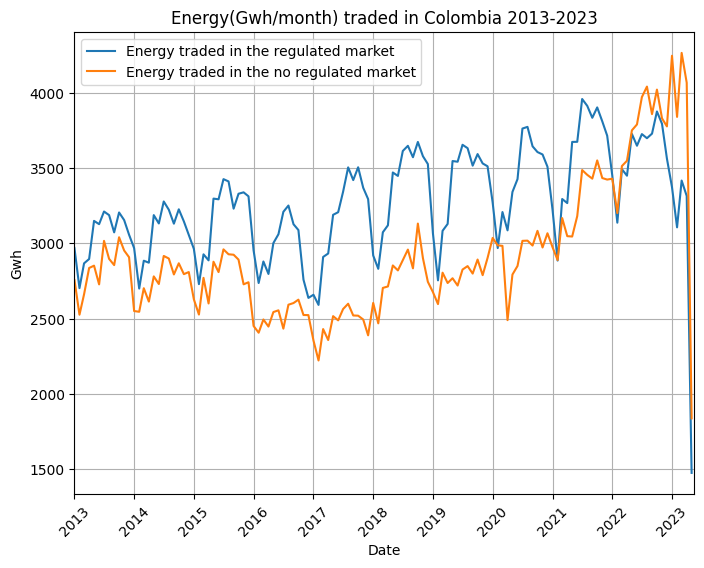

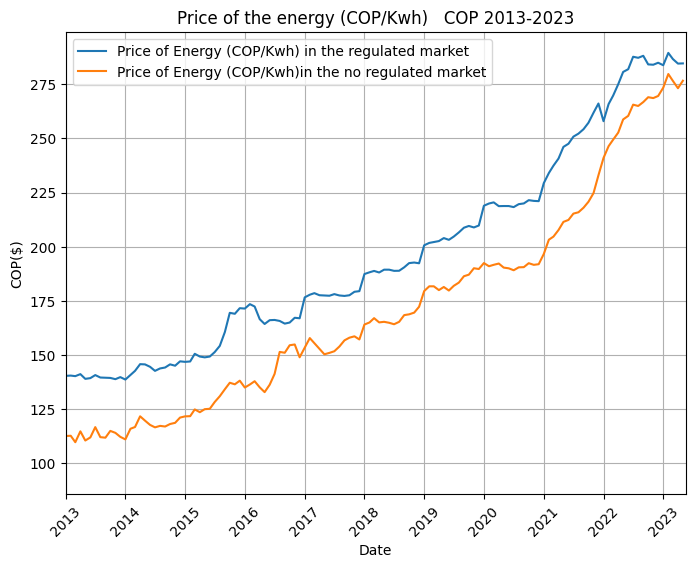

In [14]:
df = pd.read_excel('Energía y Precios transados en contratos con destino a Mercado Regulado y No Regulado.xlsx')
df['Mes'] = pd.to_datetime(df['Mes'], format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df['Mes'], df['Energía transada en contratos con destino a Mercado Regulado [GWh]'], label='Energy traded in the regulated market')

ax.plot(df['Mes'], df['Energía transada en contratos con destino a Mercado No Regulado [GWh]'], label='Energy traded in the no regulated market')

#ax.stackplot(df['Mes'], [df['Energía transada en contratos con destino a Mercado Regulado [GWh]'],df['Energía transada en contratos con destino a Mercado No Regulado [GWh]']]
, labels=['Energy traded in the regulated market','Energy traded in the no regulated market'])

plt.xticks(rotation=45)

fecha_inicio = dt.datetime(2013, 1, 1)
fecha_fin = dt.datetime(2023, 5, 18)
ax.set_xlim(fecha_inicio, fecha_fin)


# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Date')
ax.set_ylabel('Gwh')
ax.set_title('Energy(Gwh/month) traded in Colombia 2013-2023')
# Mostrar la leyenda del gráfico
ax.legend(loc='upper left')
plt.grid()
# Mostrar el gráfico
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
#ax.stackplot(df['Mes'], [df['PPP Mercado Regulado [COP/kWh]'],df['PPP Mercado No Regulado [COP/kWh]']], labels=['Energy traded in the regulated market','Energy traded in the no regulated market'])
ax.plot(df['Mes'], df['PPP Mercado Regulado [COP/kWh]'], label='Price of Energy (COP/Kwh) in the regulated market')
ax.plot(df['Mes'], df['PPP Mercado No Regulado [COP/kWh]'], label='Price of Energy (COP/Kwh)in the no regulated market')

plt.xticks(rotation=45)

fecha_inicio = dt.datetime(2013, 1, 1)
fecha_fin = dt.datetime(2023, 5, 18)
ax.set_xlim(fecha_inicio, fecha_fin)


# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Date')
ax.set_ylabel('COP($)')
ax.set_title('Price of the energy (COP/Kwh)   COP 2013-2023')
# Mostrar la leyenda del gráfico
ax.legend()
plt.grid()
# Mostrar el gráfico
plt.show()

# Contratos

In [15]:
df = pd.read_excel('Graficas Voltalia.xlsx')
df['REGISTRO'] = pd.to_datetime(df['REGISTRO'], format='%Y-%m-%d')
df['FECHA INICIAL'] = pd.to_datetime(df['FECHA INICIAL'])
df['FECHA FINAL'] = pd.to_datetime(df['FECHA FINAL'])
df.head(1)

<ipython-input-15-315de8118895>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['FECHA INICIAL'] = pd.to_datetime(df['FECHA INICIAL'])
<ipython-input-15-315de8118895>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['FECHA FINAL'] = pd.to_datetime(df['FECHA FINAL'])


,REGISTRO,AÑO,FECHA INICIAL,FECHA FINAL,DURACIÓN EN DÍAS,MODALIDAD DESPACHO,MERCADO,PRECIO PROMEDIO CONTRATOS,Años
0,2014-01-01,2014,2014-01-16,2014-02-05,21,PD,N,115,0.054795


<ipython-input-18-592943284c2e>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['FECHA INICIAL'] = pd.to_datetime(df['FECHA INICIAL'])
<ipython-input-18-592943284c2e>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['FECHA FINAL'] = pd.to_datetime(df['FECHA FINAL'])


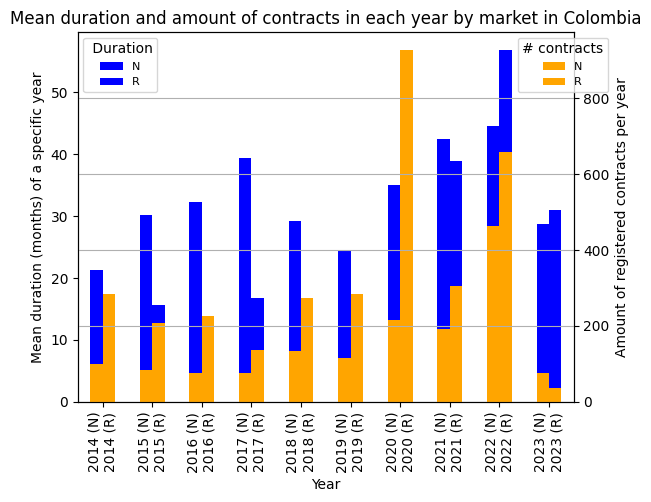

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('Graficas Voltalia.xlsx')
df['REGISTRO'] = pd.to_datetime(df['REGISTRO'], format='%Y-%m-%d')
df['FECHA INICIAL'] = pd.to_datetime(df['FECHA INICIAL'])
df['FECHA FINAL'] = pd.to_datetime(df['FECHA FINAL'])
df = df.dropna()
# Perform the groupby operation
df_markt = df.groupby(['AÑO', 'MERCADO'])['DURACIÓN EN DÍAS'].agg(['mean', 'count'])

# Convert duration from days to months
days_in_month = 30.4375  # Average number of days in a month
df_markt['mean'] = df_markt['mean'] / days_in_month

# Reshape the data using unstack()
df_markt_unstacked = df_markt.unstack()

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the duration on the first axis
df_markt_unstacked['mean'].plot(kind='bar', ax=ax1, color='blue')
ax1.set_ylabel('Mean duration (months) of a specific year')

# Create a second axis for the amount
ax2 = ax1.twinx()
df_markt_unstacked['count'].plot(kind='bar', ax=ax2, color='orange')
ax2.set_ylabel('Amount of registered contracts per year')

# Set labels and title
ax1.set_xlabel('Year')
plt.title('Mean duration and amount of contracts in each year by market in Colombia')

# Modify x-tick labels
x_labels = [f'{year} (N)\n{year} (R)' for year in df_markt_unstacked.index]
ax1.set_xticklabels(x_labels)

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1, labels1, loc='upper left',fontsize=8)
ax2.legend(lines2, labels2, loc='upper right', fontsize=8,bbox_to_anchor=(1.08, 1))#,bbox_to_anchor=(1.05, 0.95)
ax1.get_legend().set_title(' Duration')
ax2.get_legend().set_title('# contracts')

# Show the plot
plt.grid()
plt.show()


# Capacidad efectiva neta [MW] por año

esta info sale de aca https://www.xm.com.co/operaci%C3%B3n/proyectos-sin/formatos-instructivos-y-procedimientos-proyectos-sin 

## CEN [MW] actual tomada de paratec


## CEN [MW] esperada de proyectos que entran  2023-2029

,Año,Categoría del proyecto,CEN [MW]
0,2023,Eólico,221.8


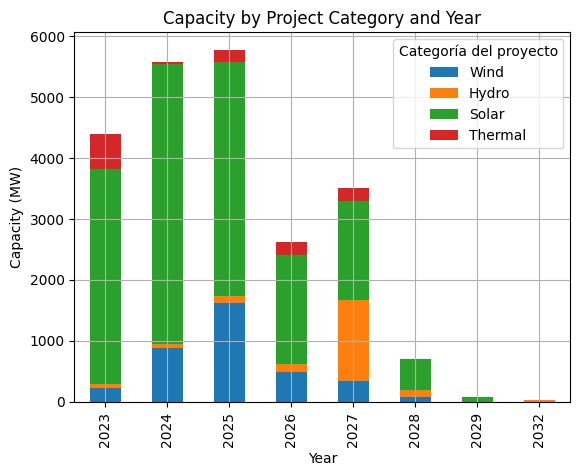

In [77]:
df = pd.read_excel('Capacidad efectiva neta [MW] por año.xlsx', skiprows=2) # descarga y limpieza
df = df.dropna()
df_cleaned = df.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
# Handle specific formatting issue (e.g., removing non-printable characters)
df = df_cleaned.replace({r'\r|\n': ' '}, regex=True)
df = df[df['Categoría del proyecto'] != 'SAEB']
# Remove specific unwanted characters or patterns
df.head(1)
###############################
df_markt = df.groupby(['Año','Categoría del proyecto'])["CEN [MW]"].agg(['sum'])
df_markt_unstacked = df_markt.unstack()
#df_markt_unstacked = df_markt_unstacked.drop('SAEB', axis=1)
df_markt_unstacked.columns = df_markt_unstacked.columns.droplevel()
df_markt_unstacked = df_markt_unstacked.rename(columns={'Eólico': 'Wind', 'Hidráulico': 'Hydro','Térmico':'Thermal'})
# Plot the DataFrame
df_markt_unstacked.plot.bar(stacked=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.ylabel('Capacity (MW)')
plt.title('Capacity by Project Category and Year')

# Show the plot
plt.grid()
plt.show()

# CEN actual y futura cruzando

* proyectos supeditados
* proyectos con oef

esta info sale de aca https://www.xm.com.co/operaci%C3%B3n/proyectos-sin/formatos-instructivos-y-procedimientos-proyectos-sin  

## CEN actual por tecnologia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Tipo': ['Cogenerator', 'Wind', 'Hydro', 'Solar', 'Thermal'],
    'CEN [MW]': [192.50, 18.42, 12584.08, 387.47, 5811.33],
}# informacion tomada de paratec

df = pd.DataFrame(data)
df = df.set_index(df.columns[0])
df = df.T  # Transpose the DataFrame

# Plot the stacked bar chart
df.plot.bar(stacked=True)

# Set labels and title
plt.xlabel('2023')
plt.ylabel('NEC [MW]')
plt.title('NEC [MW] by technology')

# Show the plot
plt.grid()
plt.show()

## CEN de proyectos por tecnologia con OEF

In [87]:
#Proyectos con OEF
df1 = pd.read_excel('pro_oef.xlsx')
df1.head(1)
df1 = df1.drop(['Código','Área operativa','Tipo OEF','Fecha obligación','Subárea operativa','Promotor','Puntos de Conexión','Fecha de Puesta en Operación Oficial'], axis=1
             )
df1 = df1.dropna()
df1.head(1)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Proyecto,CEN [MW],FPO,Tipo,OEF
0,Guayepo,400.0,2024-04-20,Solar,SI


## CEN de proyectos por tecnologia Proyectos supeditados

In [88]:
#Proyectos supeditados
df2 = pd.read_excel('pro_supe.xlsx')
df2 = df2.drop(['Código','Área operativa','Código Proyecto que supedita','Proyecto que supedita','FPO proyecto supeditado','Descripción del proyecto que supedita','Subárea operativa','Promotor','Puntos de Conexión','Fecha de Puesta en Operación Oficial'], axis=1)
df2 = df2.dropna()
df2.rename(columns={'Proyecto Generación': 'Proyecto'}, inplace=True)
df2.head(1)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Proyecto,CEN [MW],FPO,Tipo,OEF
0,Chinú,350.0,2023-12-31,Solar,NO


## proyectos que cruzan entre supeditados y proyectos con OEF

In [82]:
import numpy as np
column_values_df1 = df1['Proyecto'].values
column_values_df2 = df2['Proyecto'].values

# Find the common values
common_values = np.intersect1d(column_values_df1, column_values_df2)

# Print the common values
print(common_values)

['Acacias 2' 'Alpha' 'Beta' 'Camelias' 'JK1' 'JK2' 'Latam Solar La Loma'
 'Parque Solar Fotovoltaico Manglares' 'Solar Escobal 6' 'Tepuy']


## Cruce externo de ambos, supeditado y con OEF

In [89]:
import pandas as pd

# Assuming df1 and df2 are your two dataframes

# Merge the dataframes based on the common column
merged_outer = pd.merge(df1, df2, on=['Proyecto','CEN [MW]','FPO','Tipo','OEF'], how='right')
# Print the merged dataframe


df = merged_outer.drop_duplicates()
df['FPO'] = pd.to_datetime(df['FPO'])

# Extract the year from the 'Date' column
df['Year_FPO'] = df['FPO'].dt.year
df = df.drop('FPO', axis=1)
#############################################
# se crean 2 dataframes  df1 tiene OEF df2 No tiene OEF 
df1 = df[df['OEF'] == 'SI']
df2 = df[df['OEF'] == 'NO']
unicos1=df1['Tipo'].unique()
unicos2=df2['Tipo'].unique()
print(unicos1,

unicos2)
df_markt_unstacked.head(1)

['Eólico' 'Solar'] ['Solar' 'Eólico' 'Hidráulico' 'Térmico']


<ipython-input-89-e502771c24ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FPO'] = pd.to_datetime(df['FPO'])
<ipython-input-89-e502771c24ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_FPO'] = df['FPO'].dt.year


Categoría del proyecto,Wind,Hydro,Solar,Thermal
Año,,,,
2023,221.8,71.6,3526.087,574.25


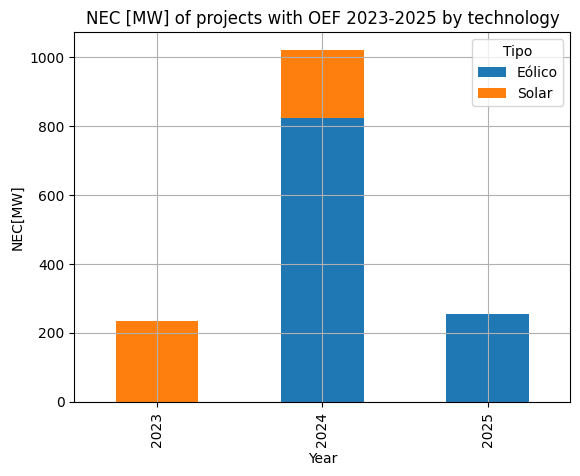

In [90]:

df_markt = df1.groupby(['Year_FPO','Tipo'])["CEN [MW]"].agg(['sum'])
df_markt_unstacked = df_markt.unstack()
#df_markt_unstacked = df_markt_unstacked.drop('SAEB', axis=1)
df_markt_unstacked.columns = df_markt_unstacked.columns.droplevel()

# # Plot the DataFrame
df_markt_unstacked.plot.bar(stacked=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('NEC[MW]')
plt.title('NEC [MW] of projects with OEF 2023-2025 by technology')



# # Show the plot
plt.grid()
plt.show()

# NEC [MW] of projects without OEF 2023-2025 by technology

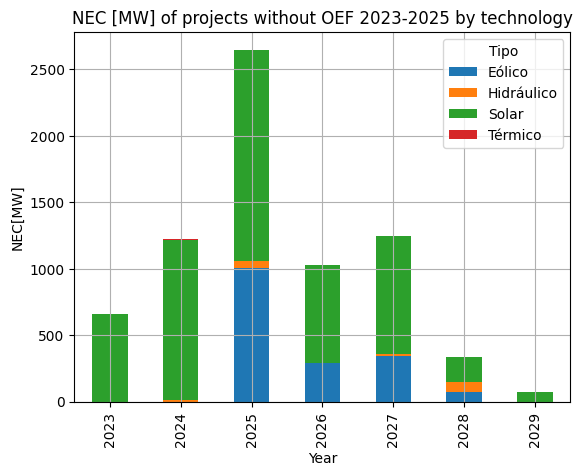

In [91]:
df_markt = df2.groupby(['Year_FPO','Tipo'])["CEN [MW]"].agg(['sum'])
df_markt_unstacked = df_markt.unstack()
#df_markt_unstacked = df_markt_unstacked.drop('SAEB', axis=1)
df_markt_unstacked.columns = df_markt_unstacked.columns.droplevel()

# # Plot the DataFrame
df_markt_unstacked.plot.bar(stacked=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('NEC[MW]')
plt.title('NEC [MW] of projects without OEF 2023-2025 by technology')



# # Show the plot
plt.grid()
plt.show()

# NEC [MW] Esperada en el tiempo 

In [95]:
data = {
    'Tipo': ['Cogenerador', 'Eólico', 'Hidráulico', 'Solar', 'Térmico'],
    'CEN [MW]': [192.50, 18.42, 12584.08, 387.47, 5811.33],
}#['Solar', 'Eólico', 'Hidráulico', 'Térmico']
CEN2023=18993.79
df = pd.DataFrame(data)

df_combined = pd.concat([df, df1, df2])

df_combined['Year_FPO'] = df_combined['Year_FPO'].fillna(2022.12)
df_combined['OEF'] = df_combined['OEF'].fillna("NO")
df_combined['Proyecto'] = df_combined['Proyecto'].fillna("SIN")
años=df_combined['Year_FPO'].unique()


columns_to_drop = ['Proyecto', 'OEF']
df_combined = df_combined.drop(columns=columns_to_drop)
df_combined

,Tipo,CEN [MW],Year_FPO
0,Cogenerador,192.50,2022.12
1,Eólico,18.42,2022.12
2,Hidráulico,12584.08,2022.12
3,Solar,387.47,2022.12
4,Térmico,5811.33,2022.12
...,...,...,...
236,Térmico,7.00,2024.00
237,Solar,6.00,2025.00
242,Solar,4.90,2025.00
243,Solar,4.30,2025.00


In [107]:
df_markt_unstacked.head(1)
unic=df_markt_unstacked.index.unique()
unic

Int64Index([2023, 2024, 2025, 2026, 2027, 2028, 2029], dtype='int64', name='Year_FPO')

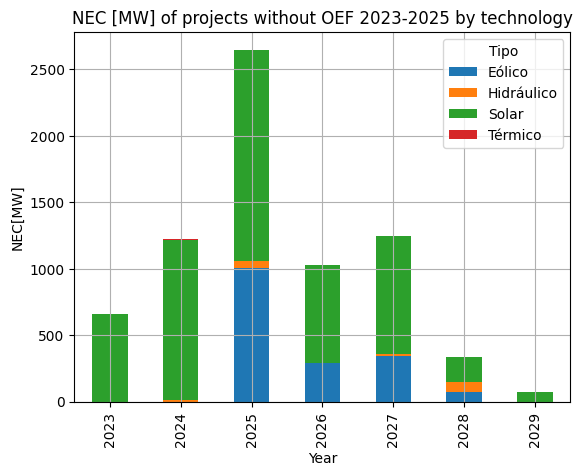

In [99]:
df_markt = df_combined.groupby(['Year_FPO',])['CEN [MW]'].agg(['sum'])
df_markt_unstacked #= df_markt.unstack()
# df_markt_unstacked

df_markt_unstacked.plot.bar(stacked=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('NEC[MW]')
plt.title('NEC [MW] of projects 2023-2029 by technology')



# # Show the plot
plt.grid()
plt.show()

In [109]:
import os
import requests
from bs4 import BeautifulSoup

def download_xlsx_files_with_power_bi(url, download_path):
    # Send a GET request to the website URL
    response = requests.get(url)
    
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all <a> tags that contain ".xlsx" and "powerbi" in their href attribute
    xlsx_files = soup.find_all('a', href=lambda href: href or '.xlsx' in href or 'powerbi' in href)
    
    # Download each XLSX file
    for file in xlsx_files:
        file_url = file['href']
        file_name = os.path.basename(file_url)
        file_path = os.path.join(download_path, file_name)
        
        # Send a GET request to download the file
        file_response = requests.get(file_url)
        
        # Save the file to the specified download path
        with open(file_path, 'wb') as f:
            f.write(file_response.content)
        
        print(f"Downloaded: {file_path}")
download_xlsx_files_with_power_bi('https://www.xm.com.co/operaci%C3%B3n/proyectos-sin/formatos-instructivos-y-procedimientos-proyectos-sin', '/content/drive/MyDrive/XM/optimaC/prueba')

TypeError: ignored

In [104]:
download_xlsx_files_with_power_bi('https://www.xm.com.co/operaci%C3%B3n/proyectos-sin/formatos-instructivos-y-procedimientos-proyectos-sin', '/content/drive/MyDrive/XM/optimaC/prueba')